<a href="https://colab.research.google.com/github/tmtakashi/til/blob/master/ml-general/simple_one_class_svm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# One-Class SVM

## データを囲む最小の球
- 学習データをすべて取り囲む超球を考え、半径が最小になるような半径と中心の位置ベクトルを求める
$$
\min_{R^2, \textbf{b}, \textbf{u}} \left\{R^2 + C\sum_{n=1}^{N}u^{(n)}\right\} \text{subject to} ||\textbf{x}^{(n)} - \textbf{b}||^2 \leq R^2 + u^{(n)}
$$
$C$は正則化定数、$u^{(n)}$は許容誤差
- $R^2, b, u$が求まったとしてデータの異常度を「超球からはみ出た長さ」として$a(\textbf{x}) = ||\textbf{x} - \textbf{b}|| - R^2 $と定義。展開すると
$$
a(\textbf{x}) = K(\textbf{x}, \textbf{x}) - 2K(\textbf{b}, \textbf{x}) + K(\textbf{b}, \textbf{b}) - R^2
$$
$K$は引数の内積を表す。


## 双対問題への変換・カーネルトリック
- 上の最適化問題は非線形性をともなうので、「双対問題(duality)」に変換して非線形性を取り除く（ラグランジュの未定乗数法の応用）
  - ラグランジュ関数を定義する（もとの目的関数 - ラグランジュ乗数 * 制約条件）
  - いま、制約条件は$R^2 + u^{(n)} - ||\textbf{x}^{(n)} - \textbf{b}||^2 \geq 0, u^{n} \geq 0$
  $$
  L(R^2, \textbf{b}, \textbf{u}, \alpha, \beta) = R^2 + C\sum_{n=1}^{N}u^{(n)} - \sum_{n=1}^{N}\beta_{n}u^{(n)} - \sum_{n=1}^{N}\alpha_{n}\left\{R^2 + u^{(n)} - ||\textbf{x}^{(n)} - \textbf{b}||^2\right\} 
  $$
  - $L$の$R^2, \textbf{b}, \textbf{u}$に関する微分を0とすると
  $$
  \begin{eqnarray}
  \frac{\partial L}{\partial R^2} &=& 1 - \sum_{n=1}^{N}\alpha_n = 0\\
  \frac{\partial L}{\partial \textbf{b}} &=& 2\sum_{n=1}^{N}\alpha_n\textbf{b} - 2\sum_{n=1}^{N}\alpha_n \textbf{x}^{(n)} = \textbf{0}\\
  \frac{\partial L}{\partial u^{(n)}} &=& C - \beta_n - \alpha_n = 0\\
  \min_{R^2, b, u}L(R^2, \textbf{b}, \textbf{u}, \alpha, \beta) &=& R^2 + C\sum_{n=1}^{N}u^{(n)} - \sum_{n=1}^{N}\beta_{n}u^{(n)} - \sum_{n=1}^{N}\alpha_{n}\left\{R^2 + u^{(n)} - ||\textbf{x}^{(n)} - \textbf{b}||^2\right\}\\
  &=&  (1 - \sum_{n=1}^{N}\alpha_n)R^2 + \sum_{n=1}^{N}u^{(n)}(C - \beta_n - \alpha_n) + \sum_{n=1}^{N}\alpha_n||\textbf{x}^{(n)} - \textbf{b}||^2\\
  &=& \sum_{n=1}^{N}\alpha_n||\textbf{x}^{(n)} - \textbf{b}||^2\\
  &=& \sum_{n=1}^{N}\alpha_n||\textbf{x}^{(n)} - \sum_{n^{'}=1}^{N}\alpha_{n^{'}}\textbf{x}^{(n^{'})}||^2
  \end{eqnarray}
  $$
  最終的に
  $$
  \max_{\alpha}( \sum_{n=1}^{N}\alpha_n K_{n, n} - \sum_{n=1, n^{'}=1}^{N}\alpha_n \alpha_{n^{'}} K_{n, n^{'}}) \text{ subject to } 0 \leq \alpha_n \leq C(N = 1, 2, ... N)\\
  ただしK_{n, n^{'}} = K(\textbf{x}^{(n)}, \textbf{x}^{(n^{'})})
  $$

  という、最初の問題よりも簡単な形に置き換えられる => 双対問題を解けばよい
  - 標本$\{\textbf{x}^{(n)}\}$の内積Kのみに依存する
    - 関数$\phi$を用いて$\textbf{x}$を$\phi(\textbf{x})$に置き換えると、
    - KをRBF（動径基底関数）カーネルに置き換える
    $$
    K(\textbf{x}, \textbf{x}^{'}) \leftarrow \exp\{-\sigma||\textbf{x} - \textbf{x}^{'}||^2\}
    $$
   - カーネル：変換$\phi$を計算しなくても、もとのベクトル$\textbf{a}, \textbf{b}$だけからドット積$K(\textbf{a}, \textbf{b}) = \phi(\textbf{a})^T \cdot \phi(\textbf{b})$を計算できる関数$K$
   - マーサーの定理により、$\phi$が存在することは分かるので、$\phi$の実態を知らなくても良い。
    - もとの標本空間を、内積が上記の式になるように非線形変換し、次元を拡張する(N次元 => ∞次元)
    - 
    - モデルが過学習しているときは$\sigma$を小さく、過小適合しているときは$\sigma$を大きくする
    - カーネルトリックと呼ばれる
    - 他にも線形カーネル、多項式カーネル、シグモイドカーネルなどがある
  
  

## 解の性質と分類
最適解$\alpha^{*}$を求めたら、KKT条件を使ってもとの解$R^2, \textbf{b}, u^{(n)}$を求めていく。最適化条件の式より
$$
\textbf{b}^{*} = \sum_{n=1}^{N}\alpha_n^{*} \textbf{x}^{(n)}
$$
KKT条件
$$
\lambda g(x) = 0\\
\lambda: ラグランジュ定数\\
g(x): 制約条件
$$
より

$$
\alpha_n^{*} \left\{R^2 + u^{(n)} - ||\textbf{x}^{(n)} - \textbf{b}||^2\right\} = 0 \\
(C - \alpha_n^{*})u^{(n)} = 0
$$
が成り立つ。
1. $\alpha_n^{*} \neq C \neq 0$のとき、 $u^{(n)} = 0, R^2 = ||\textbf{x}^{(n)} - \textbf{b}||^2$になり、この$\alpha_n^{*}$に対応する標本はちょうど球面上にあることを示す（サポートベクトル）。
2. $\alpha_n^{*} = 0$のとき、$u^{(n)} = 0, R^2 > ||\textbf{x}^{(n)} - \textbf{b}||^2$。この$\alpha_n^{*}$に対応する標本は球の内部にある。
3. $\sum_{n=1}^{N}\alpha_n = 1$より$C < 1$に対して$\alpha_n^{*} = C$のとき、$u^{(n)} > 0$ になりこの$\alpha_n^{*}$に対応する標本は球の外にある。サポートベクトルの仲間。$C < 1$にすることにより球の外にある標本の数を制御する。


- $0 < \alpha_n < C$となる$n$を一つ選び、それを$n^{'}$とすると
$$
\begin{eqnarray}
R^{2*} &=& ||\textbf{x}^{(n^{'})} - \textbf{b}||^2\\
            &=& ||\textbf{x}^{(n^{'})} - \sum_{n=1}^{N}\alpha_n^{*} \textbf{x}^{(n)}||^2\\
            &=& K_{n, n'} + \sum_{n_1,n_2=1}^{N}\alpha_{n1}^{*}\alpha_{n2}^{*} K_{n_1, n_2} - 2 \sum_{n=1}^{N}\alpha_n^*K_{n, n'} 
\end{eqnarray}
$$
と、内積と$\alpha$だけで表せる。異常度も同様に表せる。

## Scikit-learnによる実装

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager
from sklearn import svm

xx, yy = np.meshgrid(np.linspace(-5, 5, 500), np.linspace(-5, 5, 500))

# 2次元の訓練データを200サンプルつくる
X = 0.3 * np.random.randn(100, 2)
X_train = np.r_[X + 2, X - 2]

# 多数派テストデータ
X = 0.3 * np.random.randn(20, 2)
X_test = np.r_[X + 2, X - 2]
# 異常テストデータ
X_outliers = np.random.uniform(low=-4, high=4, size=(20, 2))

# 訓練
clf = svm.OneClassSVM(nu=0.1, kernel="rbf", gamma=0.1)
clf.fit(X_train)
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
y_pred_outliers = clf.predict(X_outliers)
y_pred_train, y_pred_test, y_pred_outliers

(array([ 1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,
         1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,
         1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,
         1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,
         1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,
         1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,
         1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1, -1,  1,  1,  1,  1,
         1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
         1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,
         1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,
         1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,
         1, -1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1]),
 array([ 1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1, -1,
         1,  1,  1,  1,  1

In [0]:
n_error_train = y_pred_train[y_pred_train == -1].size
n_error_test = y_pred_test[y_pred_test == -1].size
n_error_outliers = y_pred_outliers[y_pred_outliers == 1].size
n_error_train, n_error_test, n_error_outliers

(19, 5, 1)

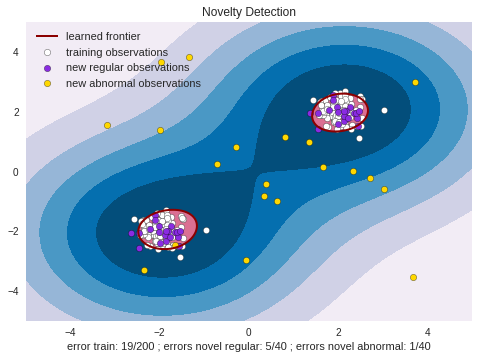

In [0]:
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.title("Novelty Detection")
plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), 0, 7), cmap=plt.cm.PuBu)
a = plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='darkred')
plt.contourf(xx, yy, Z, levels=[0, Z.max()], colors='palevioletred')

s = 40
b1 = plt.scatter(X_train[:, 0], X_train[:, 1], c='white', s=s, edgecolors='k')
b2 = plt.scatter(X_test[:, 0], X_test[:, 1], c='blueviolet', s=s,
                 edgecolors='k')
c = plt.scatter(X_outliers[:, 0], X_outliers[:, 1], c='gold', s=s,
                edgecolors='k')
plt.axis('tight')
plt.xlim((-5, 5))
plt.ylim((-5, 5))
plt.legend([a.collections[0], b1, b2, c],
           ["learned frontier", "training observations",
            "new regular observations", "new abnormal observations"],
           loc="upper left",
           prop=matplotlib.font_manager.FontProperties(size=11))
plt.xlabel(
    "error train: %d/200 ; errors novel regular: %d/40 ; "
    "errors novel abnormal: %d/40"
    % (n_error_train, n_error_test, n_error_outliers))
plt.show()